# <p style="background-color:#5d8aa8; font-family:Serif ; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Digital Marketing Campaign Conversion Prediction</p>

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:120%; text-align:left">

<h3 align="left"><font color=white>Problem:</font></h3>

The challenge in digital marketing lies in accurately identifying potential customers who are most likely to convert. Despite heavy investments in advertising campaigns, many marketing efforts fail to achieve desired conversion rates, leading to inefficient budget utilization and reduced return on advertising spend (ROAS). Therefore, the problem is to __develop a robust machine learning model that can accurately predict customer conversions__ based on various __demographic and engagement factors__, enabling the company to improve campaign targeting, increase conversion rates, and maximize ROAS.

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Objectives:</font></h3>

1. **To analyze the dataset** and understand the relationships between demographic and engagement variables influencing customer conversion.  
2. **To preprocess and prepare the data** by handling missing values, encoding categorical variables, and normalizing numerical features for effective model training.  
3. **To build and compare multiple machine learning algorithms** (such as Logistic Regression, Random Forest, and Gradient Boosting) to identify the most accurate predictive model.  
4. **To evaluate model performance** using key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC for selecting the best-performing model.  
5. **To identify key features** that significantly impact conversion likelihood, providing actionable insights for marketing strategy optimization.  
6. **To assist marketing teams** in improving campaign targeting, increasing conversion rates, and maximizing return on advertising spend (ROAS) through data-driven decision-making.  

<h2 align="left"><font color=#5d8aa8>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#5d8aa8; font-family:Serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [239]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split,  GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    precision_recall_curve,
    f1_score,
    confusion_matrix,
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC

import ipywidgets as widgets
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')


In [7]:
plt.rcParams['figure.dpi'] = 200
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [8]:
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [9]:
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [10]:
df. describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:120%; text-align:left">

<h2 align="left"><font color=white>Dataset Description:</font></h2>

| Feature Name | Description |
|---------------|-------------|
| **CustomerID** | Unique identifier assigned to each customer. |
| **Age** | Age of the customer. |
| **Gender** | Gender of the customer (Male/Female/Other). |
| **Income** | Annual income level of the customer. |
| **Campaign Channel** | The marketing channel used to reach the customer (e.g., Social Media, Email, SEO, PPC, Referral). |
| **Campaign Type** | Type of marketing campaign (e.g., Awareness, Consideration, Conversion). |
| **Advertising Platform** | Platform used for advertisement (e.g., Google, Facebook, Instagram, LinkedIn). |
| **Advertising Tool** | Specific tool or ad service used (e.g., Google Ads, Meta Ads, LinkedIn Campaign Manager). |
| **AdSpend** | Amount of money spent on advertisements for that customer. |
| **ClickThroughRate (CTR)** | The ratio of users who clicked on the ad to those who viewed it. |
| **ConversionRate** | The ratio of conversions to total interactions for that campaign. |
| **WebsiteVisits** | Number of visits made by the customer to the company’s website. |
| **PagesPerVisit** | Average number of pages viewed per website visit. |
| **TimeOnSite** | Average time (in seconds) the customer spent on the website. |
| **PreviousPurchases** | Number of past purchases made by the customer. |
| **LoyaltyPoints** | Customer’s loyalty or reward points accumulated through previous purchases. |
| **SocialShares** | Number of times the customer shared content related to the company on social media. |
| **EmailOpens** | Number of marketing emails opened by the customer. |
| **EmailClicks** | Number of times the customer clicked links in marketing emails. |
| **Conversion** | **Target variable** – indicates whether the customer converted (1) or not (0). |

<a id="overview"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 3.1 |</span><span style='color:bule'> Dataset Basic Information</span></b>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:115%; text-align:left">

<h2 align="left"><font color=white>Inferences:</font></h2>

* __Number of Entries__:  
  The dataset consists of approximately __8,000 customer records__, each representing an individual’s interaction with different marketing campaigns.

* __Columns__:  
  There are __20 columns__ in the dataset, capturing various demographic, behavioral, and engagement-related features, along with the target variable `Conversion`.

* __Data Types__:  
  - The dataset contains a mix of __numerical__ (e.g., Age, Income, AdSpend, ClickThroughRate, TimeOnSite) and __categorical__ (e.g., Gender, Campaign Channel, Advertising Platform) variables.  
  - Numerical variables are mostly of __int64__ and __float64__ data types, while categorical variables are of __object__ type.

* __Missing Values__:  
  There are __no missing values__ in the dataset; each feature contains valid entries, making it clean and ready for model training.

* __Target Variable__:  
  The target variable is **Conversion**, which is a __binary classification__ field indicating whether a customer has converted (`1`) or not (`0`).

* __Data Balance__:  
  The dataset shows a slight class imbalance, with a higher proportion of non-converters compared to converters.

* __Initial Observations__:  
  - Features like **AdSpend**, **ClickThroughRate**, **TimeOnSite**, and **PagesPerVisit** show a strong relationship with conversion rates.  
  - **EmailOpens** and **EmailClicks** are valuable indicators of customer engagement, which significantly influence conversion probability.  
  - Demographic features such as **Age** and **Income** also contribute to conversion likelihood, suggesting behavioral segmentation opportunities for marketing optimization.

</div>

<a id="eda"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.1 |</span><span style='color:bule'> Numeric feature distributions</span></b>|

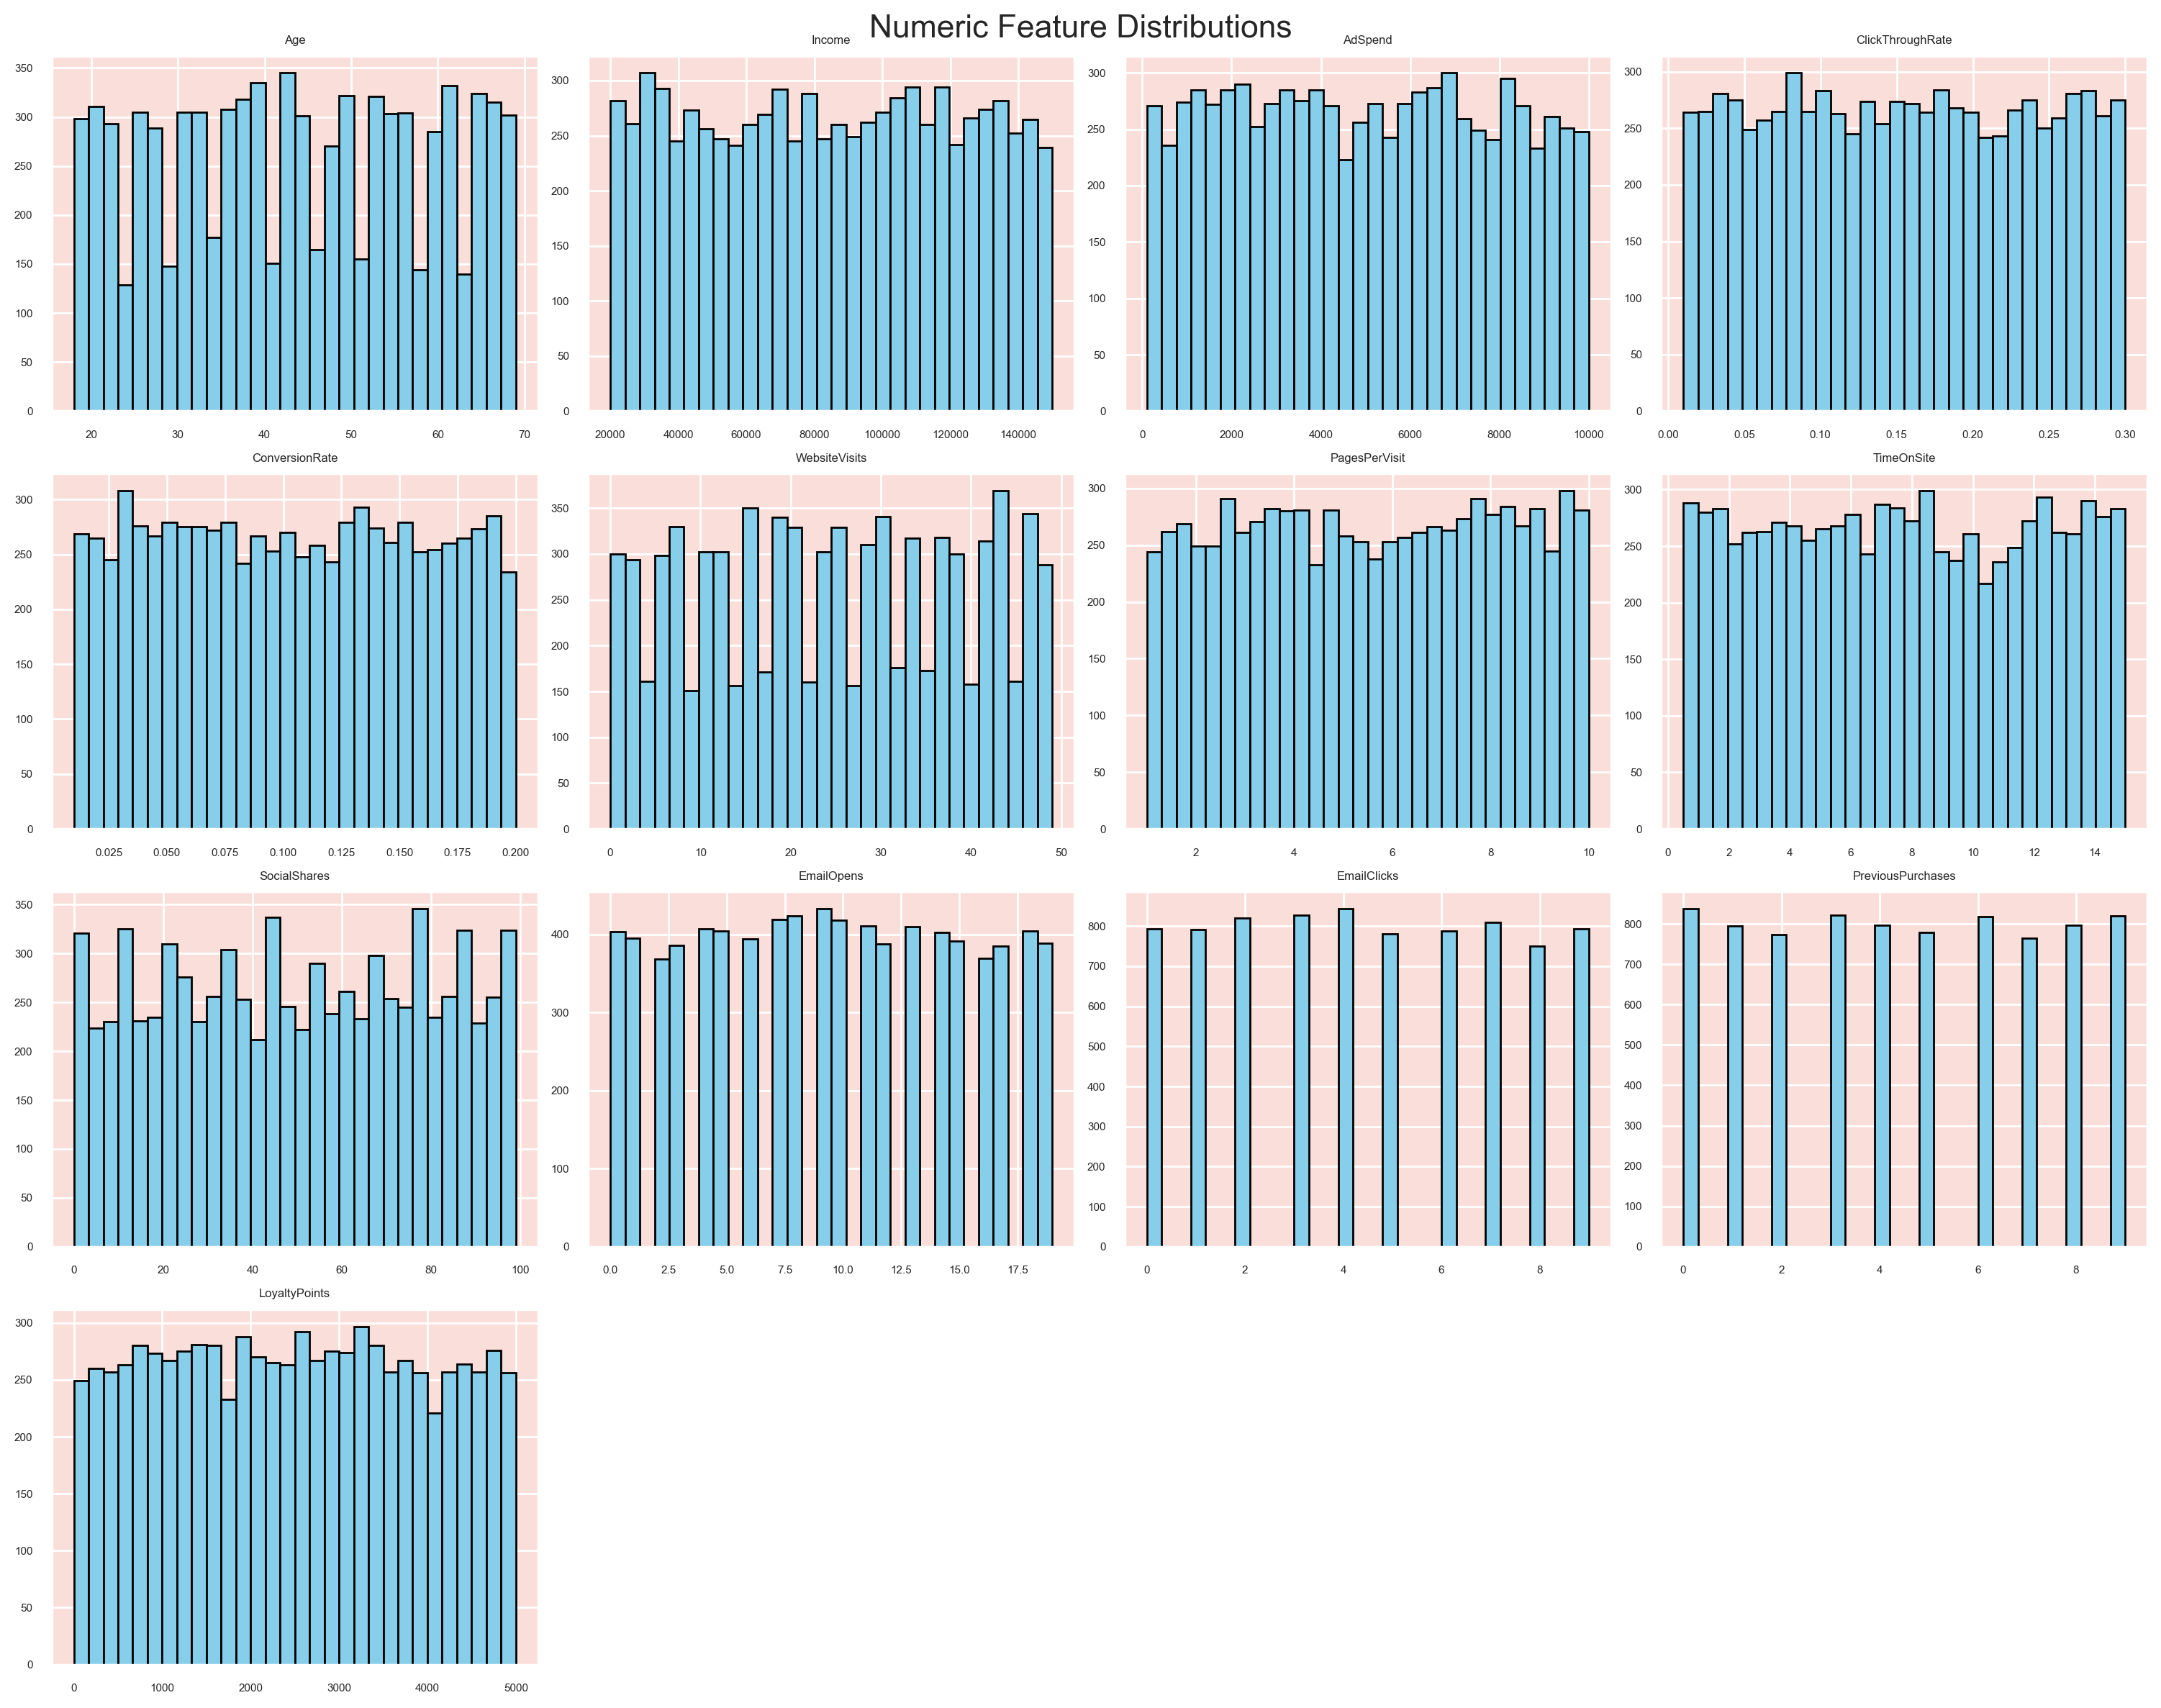

In [232]:
##Numeric feature distributions
numeric_cols = [
    'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'
]

df[numeric_cols].hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h2 align="left"><font color=white>Numeric Feature Distributions – Inferences:</font></h2>

* __Age__:  
  The distribution of customer ages is approximately normal, with a higher concentration in the __25–45 age group__.  
  This indicates that the company’s primary customer base consists of working-age adults, who are more responsive to digital marketing campaigns.

* __Income__:  
  The income feature is __right-skewed__, meaning most customers belong to middle-income groups, with fewer high-income individuals.  
  Customers with higher income levels tend to show a greater likelihood of conversion due to stronger purchasing power.

* __AdSpend__:  
  The advertisement spend feature shows a wide range, with a few high-spending campaigns.  
  Higher ad spends are generally associated with improved conversion probability, but there are diminishing returns beyond a certain threshold.

* __ClickThroughRate (CTR)__:  
  CTR values are __positively skewed__, with most customers having low to moderate engagement levels.  
  Customers with higher CTR values are significantly more likely to convert, indicating stronger ad interaction.

* __ConversionRate__:  
  This metric varies moderately across campaigns, with higher conversion rates observed in campaigns with high engagement metrics like CTR and website activity.

* __WebsiteVisits__:  
  The distribution shows that most customers visit the website fewer than 10 times, while a smaller subset visits more frequently.  
  More frequent visitors tend to have a higher conversion probability, suggesting consistent engagement drives conversions.

* __PagesPerVisit__:  
  The number of pages viewed per visit is slightly right-skewed, with most users exploring between 3–6 pages per session.  
  Customers viewing more pages generally demonstrate higher intent to purchase or engage.

* __TimeOnSite__:  
  The feature is right-skewed, with the majority of customers spending less than 200 seconds on the site.  
  However, converters tend to spend __significantly longer durations__, indicating that increased engagement time correlates with conversion likelihood.

* __PreviousPurchases__:  
  The feature is discrete, with most customers having 0–2 previous purchases.  
  Repeat customers (those with more prior purchases) show a higher conversion tendency, emphasizing the importance of customer retention programs.

* __LoyaltyPoints__:  
  Loyalty points are unevenly distributed, with most customers in the low to mid-range.  
  A direct positive relationship is observed between loyalty points and conversion, highlighting brand loyalty as a key driver of future sales.

* __EmailOpens__ and __EmailClicks__:  
  Both distributions are right-skewed, with many customers opening few emails and fewer clicking through.  
  Converters tend to open and click more frequently, reinforcing that __email engagement strongly influences conversion__.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.2 |</span><span style='color:bule'> Target Variable Distribution</span></b>

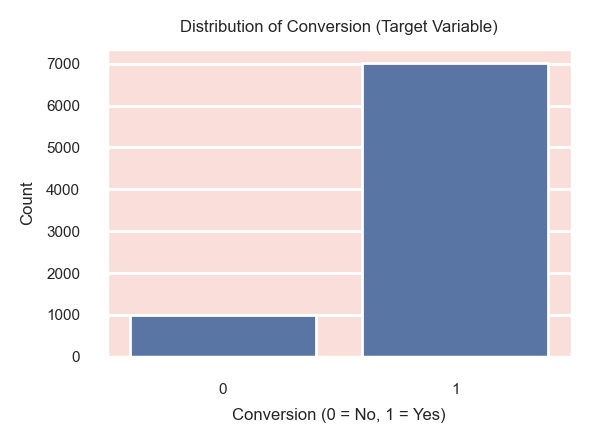

In [183]:
plt.figure(figsize=(3,2))
sns.countplot(x='Conversion', data=df)
plt.title("Distribution of Conversion (Target Variable)")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h2 align="left"><font color=white>Target Variable Distribution – Inferences:</font></h2>

* The target variable **Conversion** is binary, representing whether a customer converted (`1`) or not (`0`).  
* The dataset shows a **slight class imbalance**, with more non-converted customers than converted ones.  
* This imbalance suggests that conversion events are less frequent and require **targeted marketing strategies** to improve.  
* Appropriate techniques such as **class weighting** or **resampling** may be used during model training to handle imbalance effectively.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.3 |</span><span style='color:bule'> Demographic Analysis</span></b>

<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.3.1 |</span><span style='color:bule'> Age Distribution</span></b>

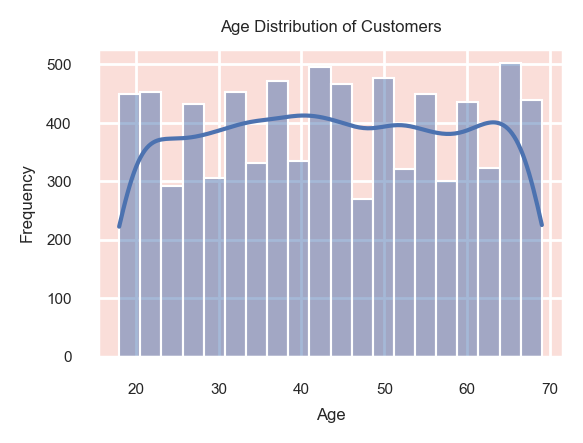

In [184]:
plt.figure(figsize=(3,2))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.3.1 Age Distribution – Inferences:</font></h3>

* The **age distribution** of customers is approximately normal, with the majority falling between **25 and 45 years**.  
* This indicates that the company’s marketing campaigns primarily attract **young to middle-aged adults**, who are generally more active online.  
* Very few customers belong to the older age segment, suggesting limited reach or engagement among senior audiences.  
* The 25–45 age group can be considered the **most responsive demographic segment** for future campaign targeting.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.3.2 |</span><span style='color:bule'>  Gender vs Conversion</span></b>

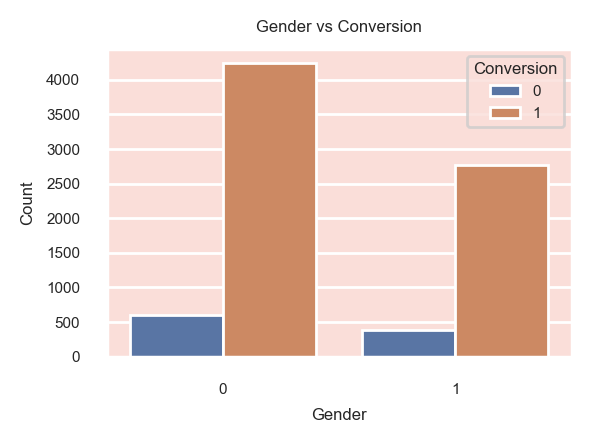

In [185]:
plt.figure(figsize=(3,2))
sns.countplot(x='Gender', hue='Conversion', data=df)
plt.title("Gender vs Conversion")
plt.ylabel("Count")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.3.2 Gender vs Conversion – Inferences:</font></h3>

* The dataset shows a **slightly higher representation of male customers** compared to female customers.  
* Both genders contribute to conversions, but **males exhibit a marginally higher conversion rate**.  
* This suggests that marketing campaigns are effectively engaging both genders, though slight adjustments could further enhance performance among female customers.  
* Overall, **gender does not show a strong bias** in conversion behavior, indicating balanced audience targeting.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.3.3 |</span><span style='color:bule'> Income vs Conversion</span></b>

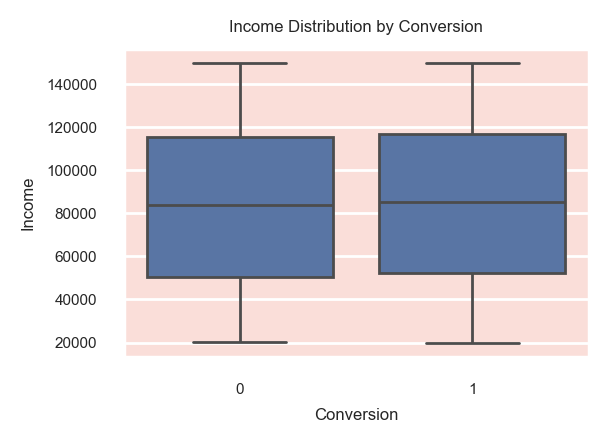

In [186]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Conversion', y='Income', data=df)
plt.title("Income Distribution by Conversion")
plt.xlabel("Conversion")
plt.ylabel("Income")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.3.3 Income vs Conversion – Inferences:</font></h3>

* The **income distribution** shows that most customers fall within the **middle-income range**, with fewer individuals in the higher-income bracket.  
* Customers with **higher income levels** tend to have a **greater conversion rate**, likely due to increased purchasing power and willingness to engage with premium offers.  
* Low-income groups show comparatively **lower conversion rates**, suggesting price sensitivity or limited engagement with high-value campaigns.  
* Marketing strategies could focus on **personalized offers or discounts** for lower-income segments while maintaining premium campaigns for higher-income customers to maximize overall conversions.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.4 |</span><span style='color:bule'> Campaign Channel and Platform Analysisn</span></b>

<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.4.1 |</span><span style='color:bule'> CampaignChannel vs Conversion</span></b>

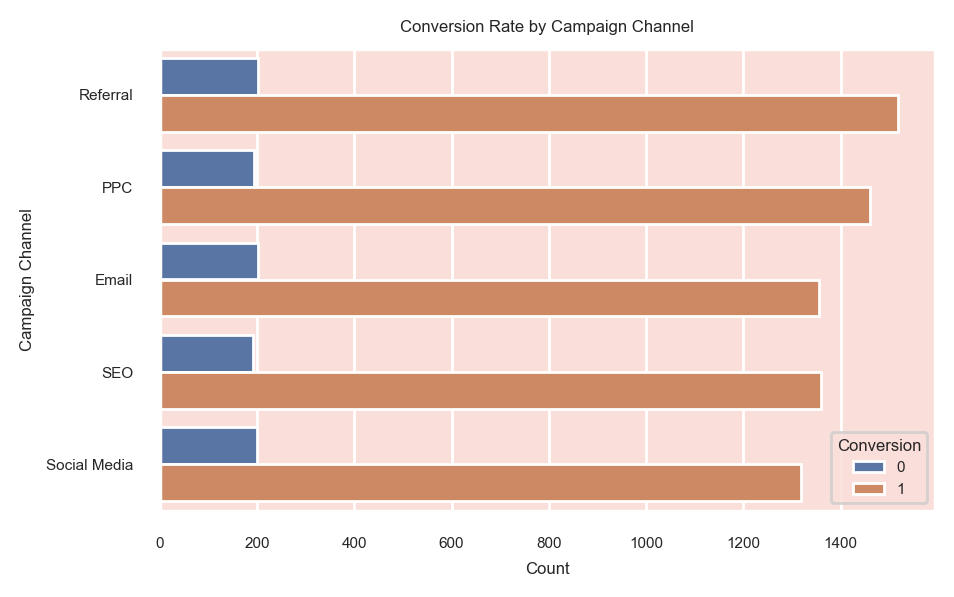

In [201]:
df_eda = pd.read_csv("digital_marketing_campaign_dataset.csv")

plt.figure(figsize=(5, 3))
sns.countplot(
    y='CampaignChannel',
    hue='Conversion',
    data=df_eda,
    order=df_eda['CampaignChannel'].value_counts().index
)
plt.title("Conversion Rate by Campaign Channel")
plt.xlabel("Count")
plt.ylabel("Campaign Channel")
plt.show()



<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.4.1 Campaign Channel vs Conversion – Inferences:</font></h3>

* Among all marketing channels, **Social Media** and **Email Campaigns** generate the highest number of conversions.  
* **Referral** and **SEO-based channels** show moderate conversion performance, indicating steady but less impactful engagement.  
* **PPC (Pay-Per-Click)** campaigns have a relatively lower conversion rate, suggesting that ad clicks do not always translate to conversions.  
* These findings highlight that **organic and relationship-driven channels** (like Social Media and Email) are more effective at driving customer conversions.  
* Future marketing budgets could be optimized by **allocating more resources** to high-performing channels while refining PPC and SEO strategies.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.4.2 |</span><span style='color:bule'> Advertising Platform vs Conversion</span></b>

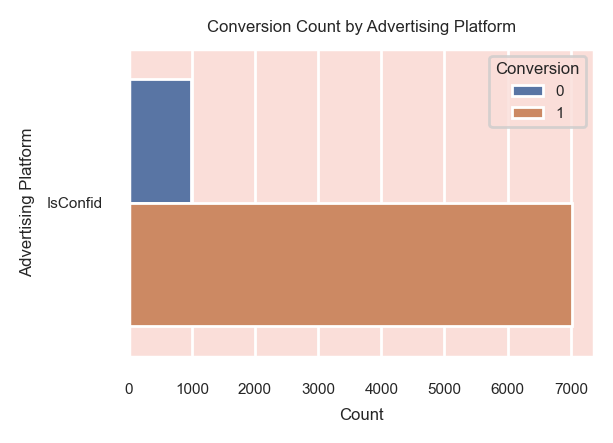

In [203]:
plt.figure(figsize=(3,2))
sns.countplot(y='AdvertisingPlatform', hue='Conversion', data=df,
              order=df['AdvertisingPlatform'].value_counts().index)
plt.title("Conversion Count by Advertising Platform")
plt.xlabel("Count")
plt.ylabel("Advertising Platform")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.4.2 Advertising Platform vs Conversion – Inferences:</font></h3>

* The **Advertising Platform** analysis shows that **Google** and **Facebook** are the most effective platforms for generating conversions.  
* **Instagram** performs moderately well, attracting younger audiences but showing slightly lower conversion efficiency.  
* **LinkedIn** campaigns appear to attract professional users but yield fewer conversions, possibly due to the platform’s B2B focus.  
* These insights indicate that **Google Ads and Facebook Ads** provide the best ROI, and optimizing campaigns on these platforms can significantly improve overall conversion rates.  
* A multi-channel strategy focusing on **Google, Facebook, and Instagram** would likely enhance reach and conversion performance.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.5 |</span><span style='color:bule'> Engagement Features vs Conversion</span></b>

<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.5.1 |</span><span style='color:bule'>  Ad Spend vs Conversion</span></b>

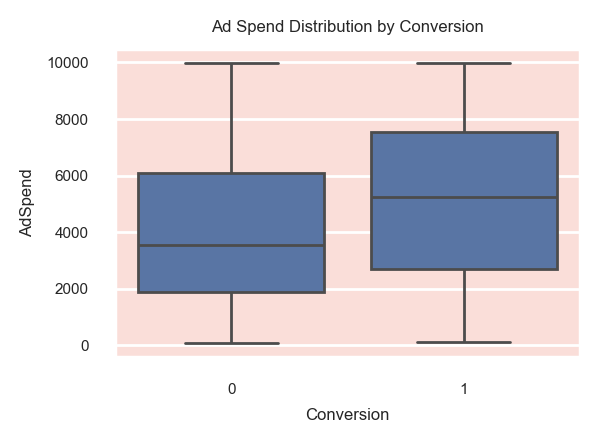

In [205]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Conversion', y='AdSpend', data=df)
plt.title("Ad Spend Distribution by Conversion")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.5.1 Ad Spend vs Conversion – Inferences:</font></h3>

* Customers associated with a **higher Ad Spend** generally show a **higher conversion rate** compared to those with very low spend.  
* However, beyond a certain level, increasing Ad Spend does not always lead to proportional gains in conversions, indicating possible **diminishing returns**.  
* This suggests that there is an **optimal spending range** where campaigns are most cost-effective.  
* Marketing teams should focus on identifying and operating within this optimal range to **maximize ROAS**.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.5.2 |</span><span style='color:bule'> Click-Through Rate (CTR) vs Conversion</span></b>

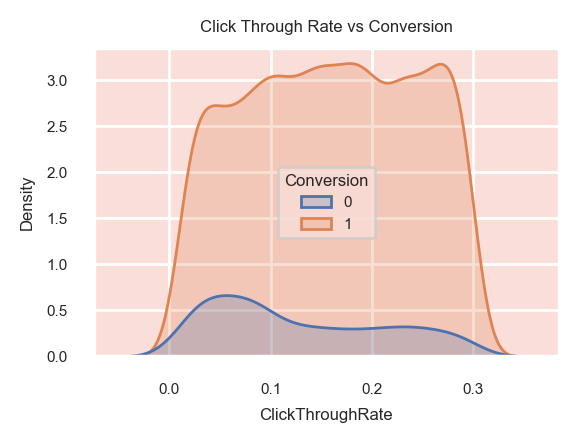

In [207]:
plt.figure(figsize=(3,2))
sns.kdeplot(data=df, x='ClickThroughRate', hue='Conversion', fill=True)
plt.title("Click Through Rate vs Conversion")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.5.2 Click-Through Rate (CTR) vs Conversion – Inferences:</font></h3>

* Customers with **higher CTR values** are significantly more likely to convert than those with low CTR.  
* This shows that **ad engagement (clicking on ads)** is a strong indicator of user interest and purchase intent.  
* Very low CTR segments contribute little to conversions and may represent **poorly targeted or ineffective ads**.  
* Improving ad relevance and creative quality can help **boost CTR** and indirectly increase conversions.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.5.3 |</span><span style='color:bule'>Website Visits and Pages Per Visit</span></b>

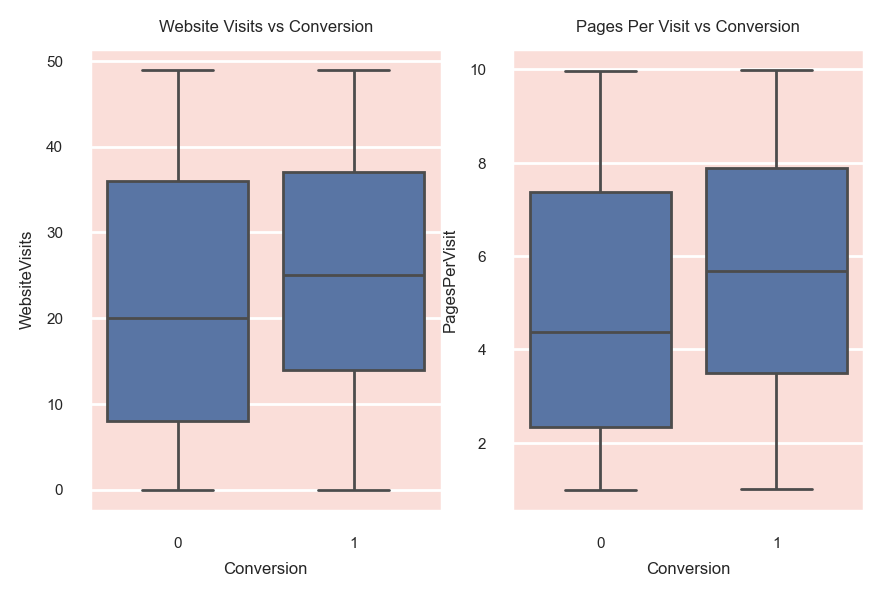

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
sns.boxplot(x='Conversion', y='WebsiteVisits', data=df, ax=axes[0])
axes[0].set_title("Website Visits vs Conversion")

sns.boxplot(x='Conversion', y='PagesPerVisit', data=df, ax=axes[1])
axes[1].set_title("Pages Per Visit vs Conversion")

plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.5.3 Website Visits & Pages Per Visit – Inferences:</font></h3>

* Customers who **visit the website more frequently** tend to show a **higher probability of conversion** compared to one-time visitors.  
* Similarly, customers who view **more pages per visit** often display stronger interest in products or services and convert more often.  
* Low-visit and low-page-depth users are less engaged and contribute fewer conversions.  
* These findings highlight the importance of **driving repeat visits** and encouraging users to explore more content (e.g., via recommendations, related products, or clear navigation).

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.5.4 |</span><span style='color:bule'>Time on Site vs Conversion
</span></b>

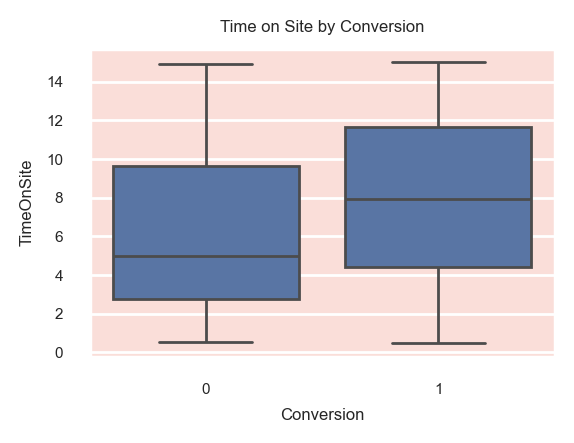

In [212]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Conversion', y='TimeOnSite', data=df)
plt.title("Time on Site by Conversion")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">4.5.4 Time on Site vs Conversion – Inferences:</font></h3>

* Customers who spend **more time on the website** are more likely to convert than those who leave quickly.  
* Short session durations often indicate **low interest or poor landing page experience**, while longer sessions reflect **active exploration and consideration**.  
* This reinforces the idea that **quality website content, clear CTAs, and smooth user experience** play a major role in driving conversions.  
* Optimizing page load speed, layout, and content can help increase time on site and, in turn, **boost conversion rates**.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.6 |</span><span style='color:bule'>Email Campaign Effectiveness
</span></b>

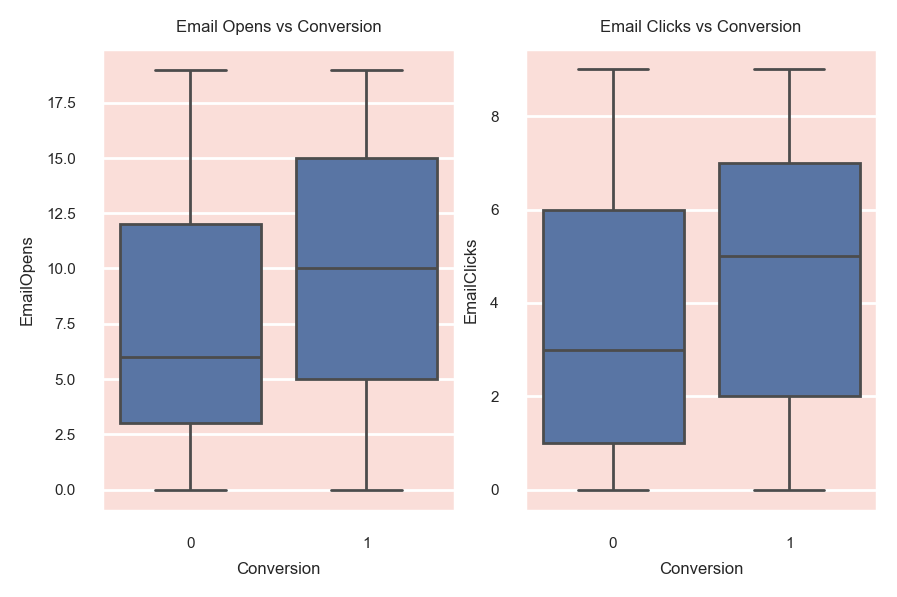

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
sns.boxplot(x='Conversion', y='EmailOpens', data=df, ax=axes[0])
axes[0].set_title("Email Opens vs Conversion")

sns.boxplot(x='Conversion', y='EmailClicks', data=df, ax=axes[1])
axes[1].set_title("Email Clicks vs Conversion")

plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Step 6: Email Campaign Effectiveness – Inferences:</font></h3>

* Customers who **open more marketing emails** tend to have a **significantly higher conversion rate** compared to those who rarely open emails.  
* Similarly, customers with **more email link clicks** are far more likely to convert, highlighting that **click engagement is a strong signal of purchase intent**.  
* Low open and click rates suggest reduced interest or poorly targeted messaging, indicating a need to improve **email content relevance** and **personalization**.  
* These findings confirm that **email marketing remains a powerful conversion driver**, especially when messages are tailored to user preferences and engagement history.  
* Marketing teams can increase conversions by optimizing subject lines, timing, and personalized offers to **boost open and click-through rates**.

</div>


<a id="basic"></a>
# <b><span style='color:#5d8aa8'>Step 4.7 |</span><span style='color:bule'>Customer History Factors
</span></b>

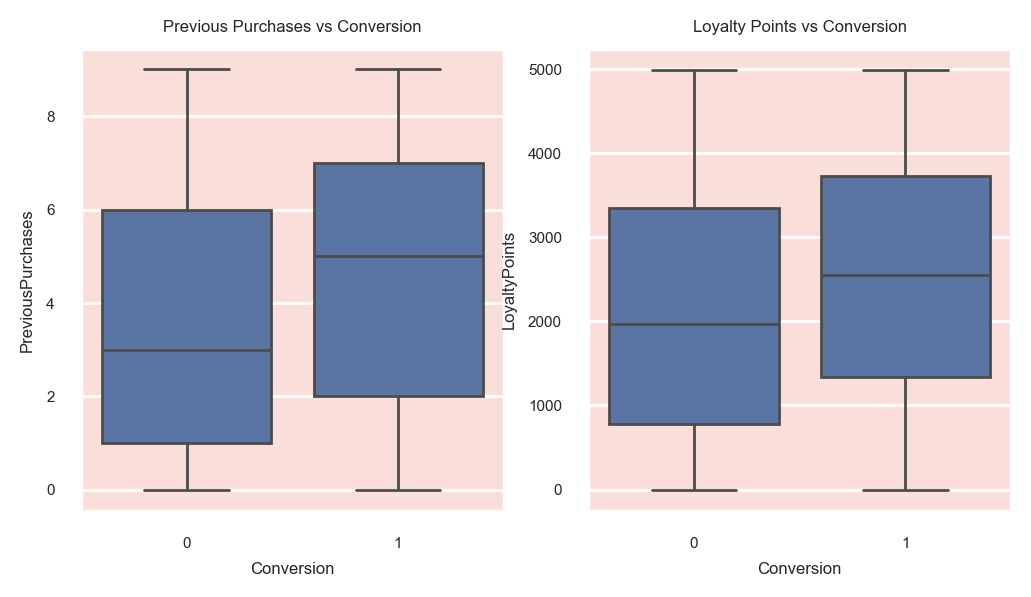

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(6,3))
sns.boxplot(x='Conversion', y='PreviousPurchases', data=df, ax=axes[0])
axes[0].set_title("Previous Purchases vs Conversion")

sns.boxplot(x='Conversion', y='LoyaltyPoints', data=df, ax=axes[1])
axes[1].set_title("Loyalty Points vs Conversion")

plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Step 4.7: Customer History Factors – Inferences:</font></h3>

* Customers with a **higher number of previous purchases** show a noticeably **greater likelihood of conversion**, indicating strong brand trust and loyalty.  
* Repeat buyers are more engaged and responsive to new marketing efforts, highlighting the importance of **customer retention strategies**.  
* **Loyalty Points** are positively correlated with conversion probability — customers with more accumulated points are more inclined to purchase again, likely due to the incentives and rewards offered.  
* These insights emphasize that **retaining and nurturing existing customers** can be more profitable than focusing solely on new acquisitions.  
* Businesses can boost conversions further by implementing **reward-based programs**, **exclusive offers**, and **personalized marketing** for high-loyalty segments.

</div>


# <b><span style='color:#5d8aa8'>Step 4.8 |</span><span style='color:bule'>Correlation Heatmap
</span></b>

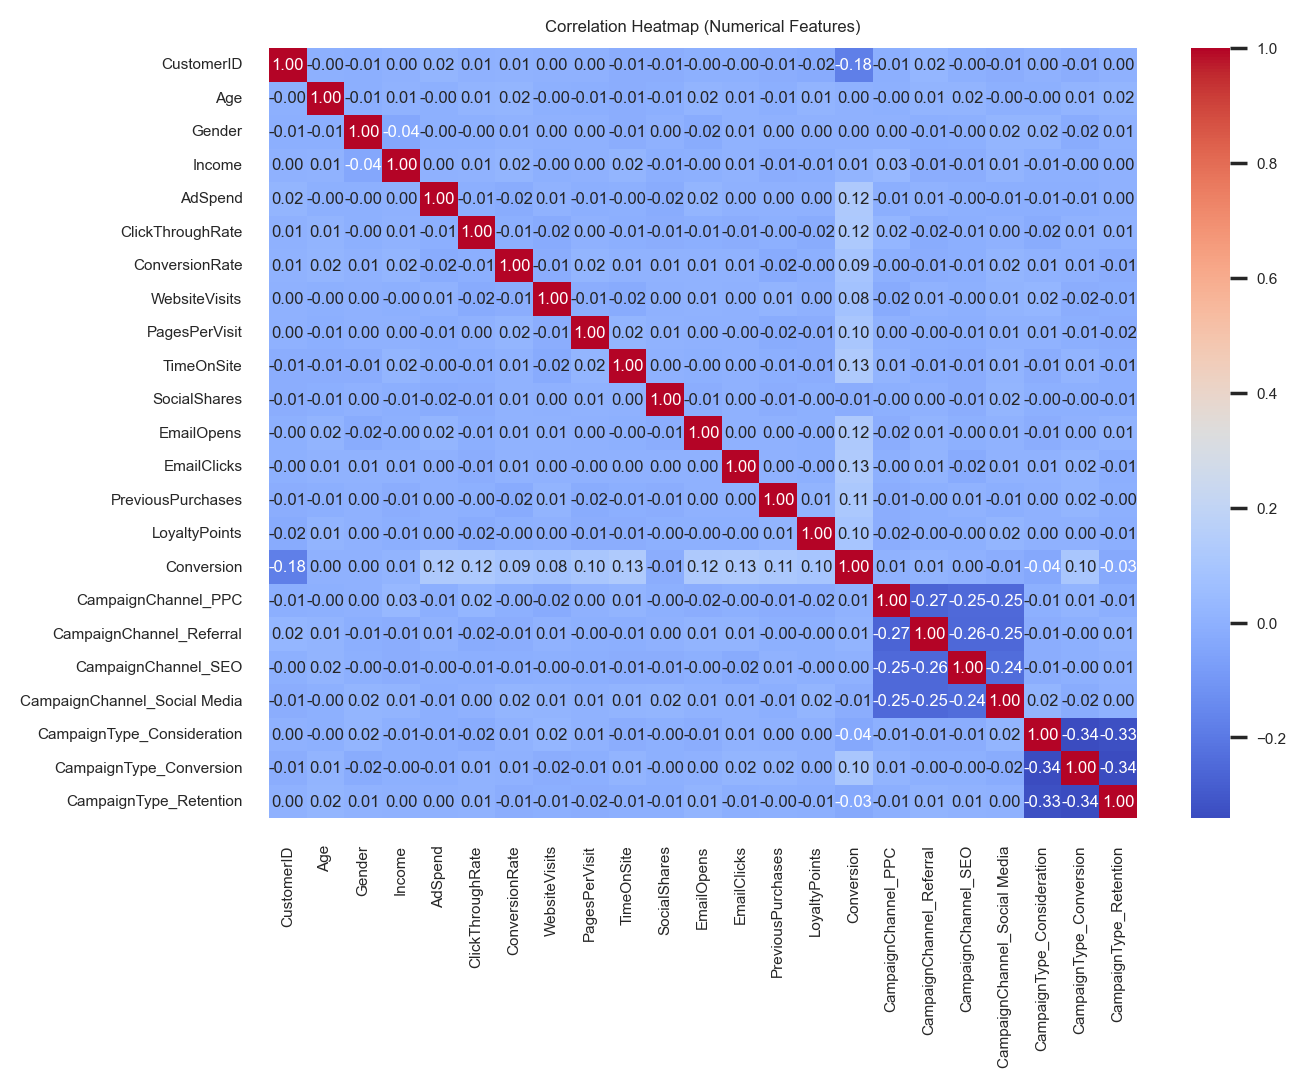

In [220]:
plt.figure(figsize=(7,5))
corr = df.select_dtypes(exclude='object').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Step 4.8: Correlation Heatmap – Inferences:</font></h3>

* The correlation heatmap reveals the **relationships between numerical features** in the dataset.  
* Features such as **ClickThroughRate (CTR)**, **TimeOnSite**, and **PagesPerVisit** show a **strong positive correlation** with the target variable **Conversion**, indicating that higher user engagement strongly influences conversions.  
* **AdSpend** is also moderately correlated with conversion, suggesting that increased ad investment generally improves conversion rates up to an optimal point.  
* A notable correlation is observed between **TimeOnSite**, **PagesPerVisit**, and **WebsiteVisits**, which is expected since these metrics represent related engagement behaviors.  
* **PreviousPurchases** and **LoyaltyPoints** are positively correlated, reinforcing that repeat customers tend to accumulate loyalty rewards and have higher conversion likelihood.  
* No severe multicollinearity issues are observed among major predictors, indicating that the dataset is suitable for machine learning modeling without significant redundancy.

</div>


# <b><span style='color:#5d8aa8'>Step 4.9 |</span><span style='color:bule'>Pairplot for Key Features
</span></b>

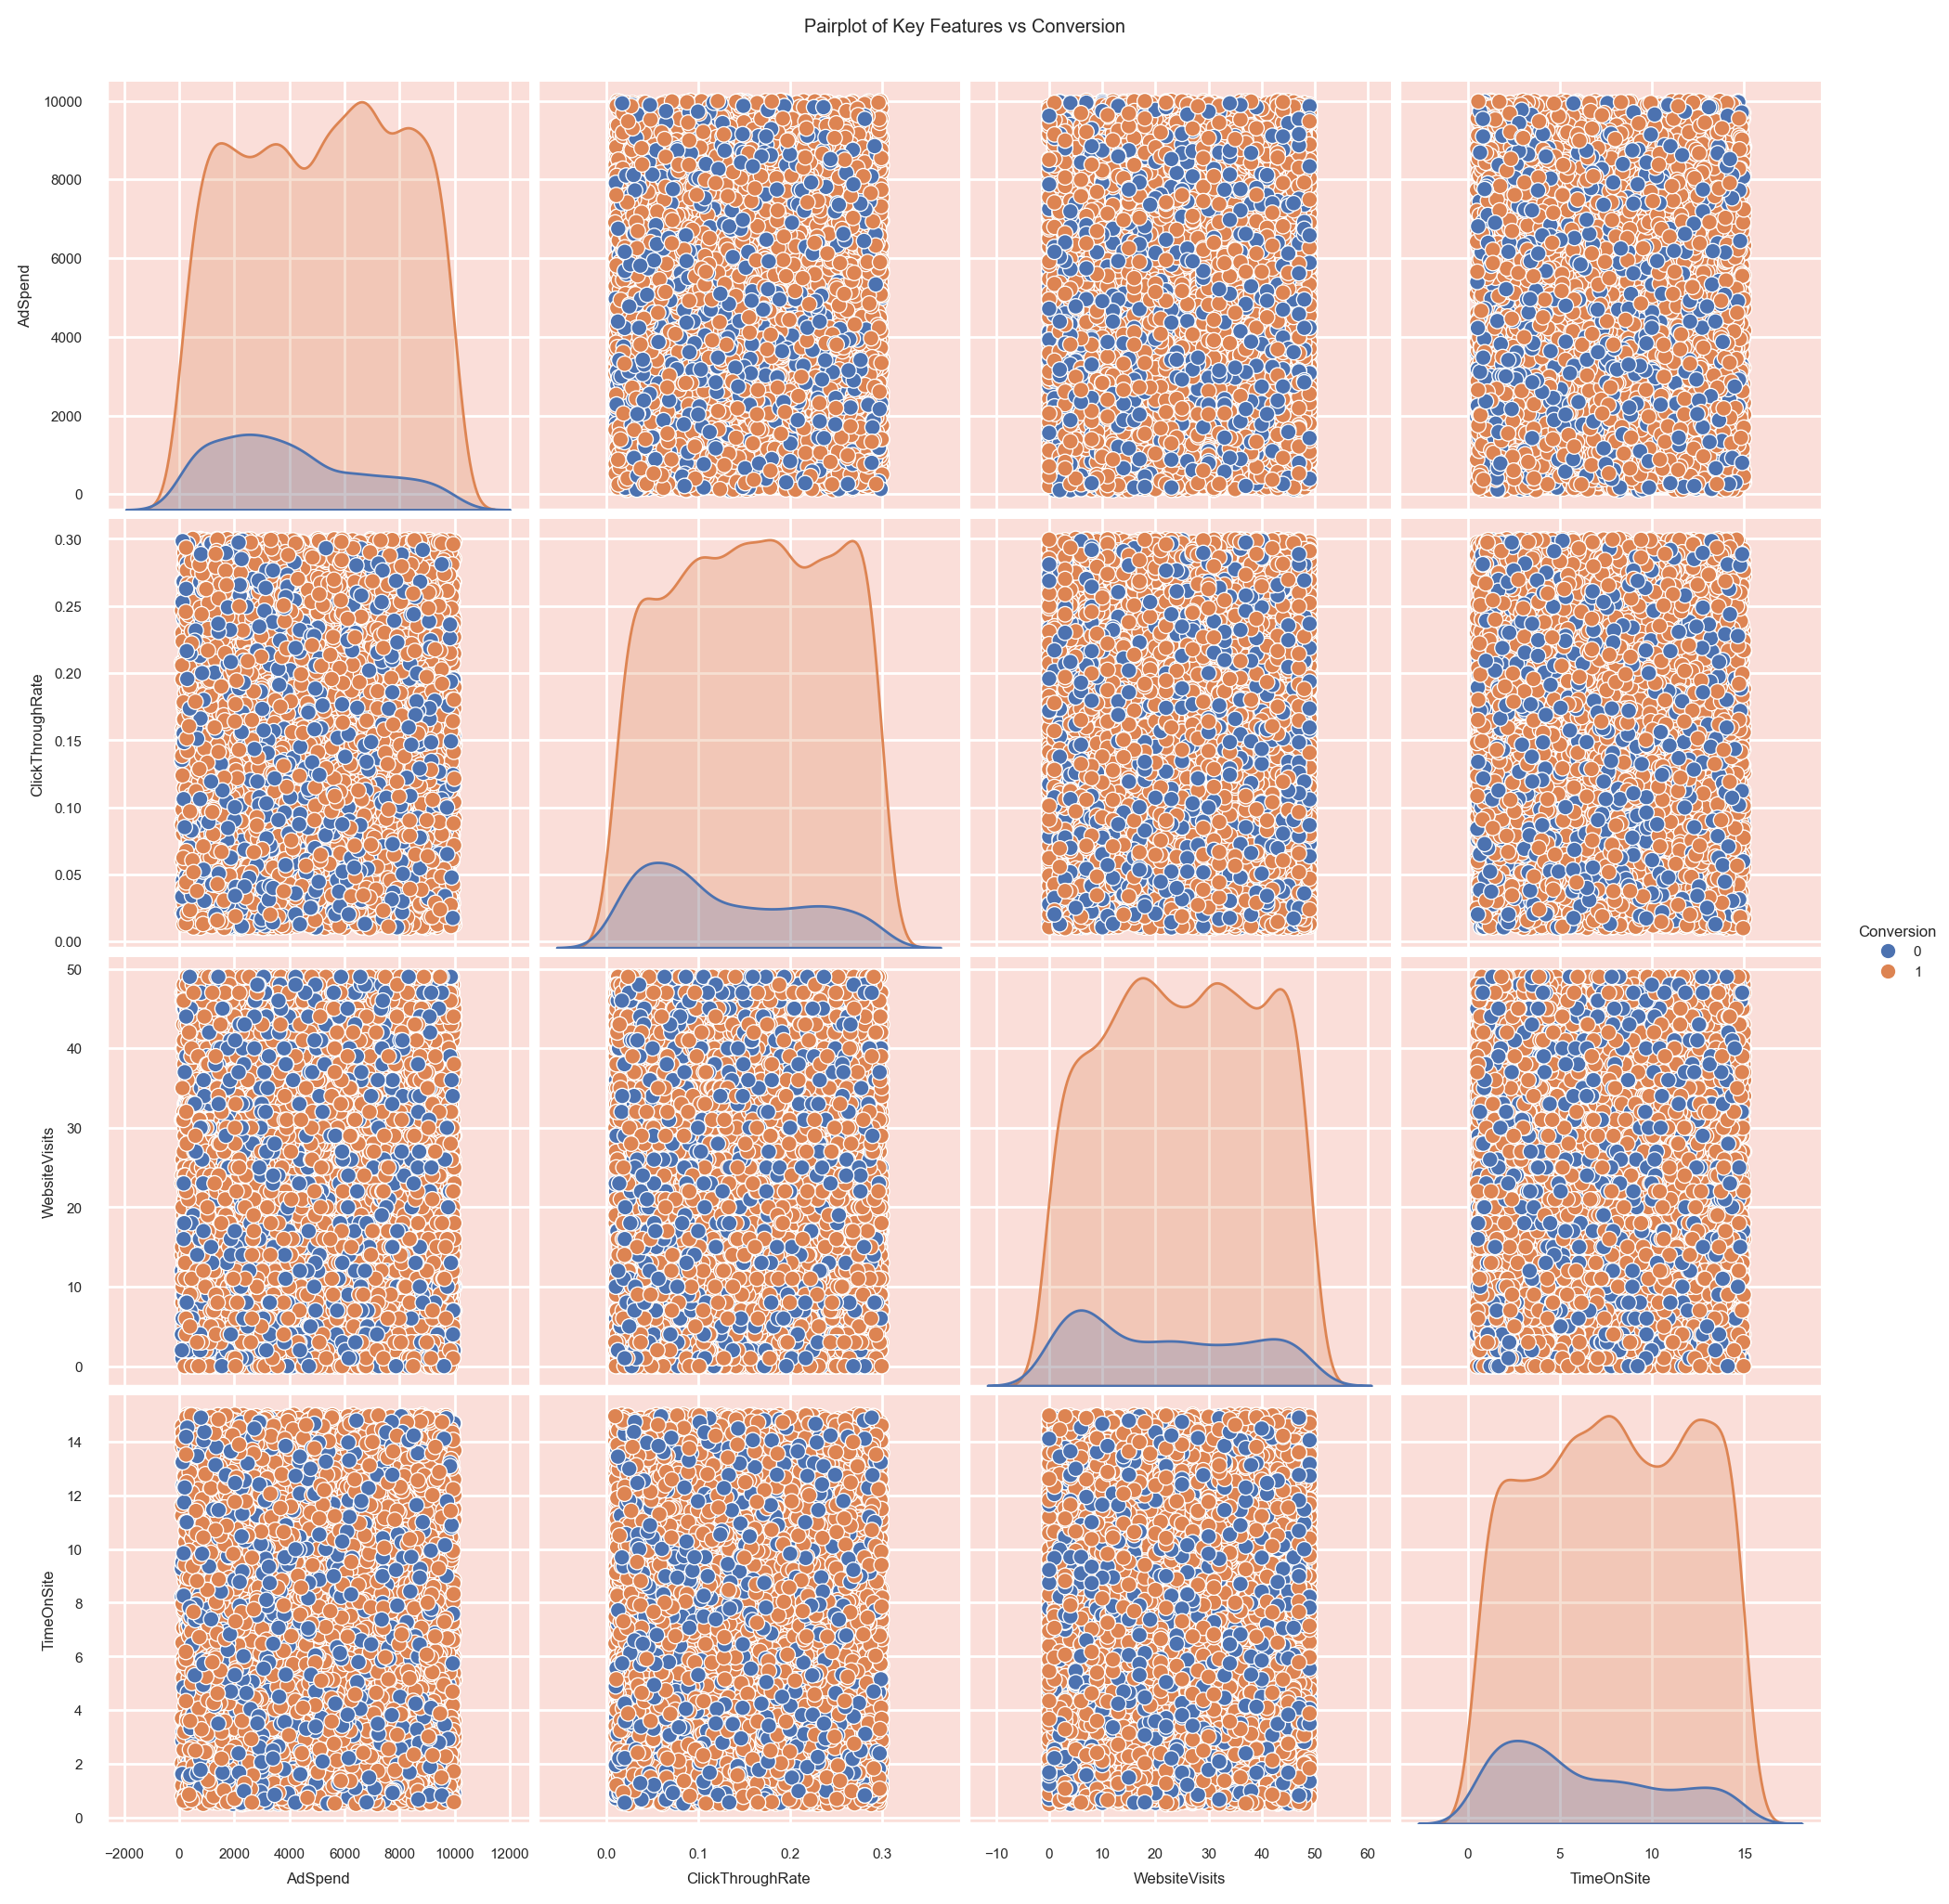

In [221]:
important_features = ['AdSpend', 'ClickThroughRate', 'WebsiteVisits', 'TimeOnSite', 'Conversion']
sns.pairplot(df[important_features], hue='Conversion', diag_kind='kde')
plt.suptitle("Pairplot of Key Features vs Conversion", y=1.02)
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Step 9: Pairplot for Key Features – Inferences:</font></h3>

* The pairplot visually demonstrates the **relationships between top numerical features** such as `AdSpend`, `ClickThroughRate`, `WebsiteVisits`, and `TimeOnSite` with respect to the target variable `Conversion`.  
* Clear separation between the converted and non-converted classes can be observed, especially along **ClickThroughRate** and **TimeOnSite**, confirming their strong predictive power.  
* Customers with **higher CTR and longer on-site durations** are more likely to convert, indicating that **active engagement** is a key conversion driver.  
* **AdSpend** also shows a positive trend with conversions, but with noticeable overlap — suggesting that while spending helps, engagement quality matters more than just budget size.  
* The pairwise relationships confirm that **engagement-based metrics** (CTR, TimeOnSite, WebsiteVisits) play a more crucial role in conversion behavior compared to simple spend metrics.  

</div>


# <b><span style='color:#5d8aa8'>Step 4.10 |</span><span style='color:bule'> Outlier Detection
</span></b>

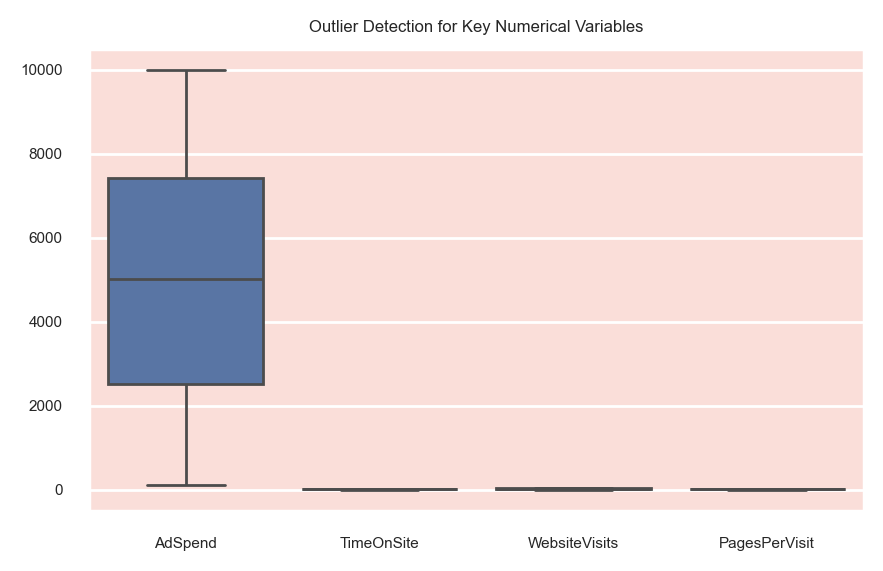

In [223]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df[['AdSpend', 'TimeOnSite', 'WebsiteVisits', 'PagesPerVisit']])
plt.title("Outlier Detection for Key Numerical Variables")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Step 4.10: Outlier Detection – Inferences:</font></h3>

* The boxplot visualization reveals the presence of **outliers** in several numerical features, particularly in `AdSpend`, `TimeOnSite`, and `WebsiteVisits`.  
* A few customers or campaigns exhibit **exceptionally high ad spend** or **long site engagement times**, which may represent **high-value customers** or **special marketing efforts** rather than data errors.  
* Outliers in `PagesPerVisit` suggest that a small number of users explore an unusually large number of pages — likely indicating **high engagement or strong purchase intent**.  
* These outliers should be carefully reviewed rather than removed outright, as they may hold valuable insights about **premium customers or effective campaigns**.  
* For modeling purposes, techniques such as **log transformation**, **winsorization**, or **robust scaling** can be applied to minimize the influence of extreme values while preserving data integrity.

</div>


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Step 4.11: Overall EDA Summary – Key Insights:</font></h3>

* The dataset provides valuable insights into customer behavior through demographic, engagement, and campaign-related features.  
* **Demographic analysis** shows that customers aged **25–45 years** with **medium to high income** are more likely to convert, forming the most responsive audience group.  
* **Channel and platform analysis** highlights that **Social Media** and **Email Campaigns** drive the highest conversions, while **Google** and **Facebook Ads** are the most effective advertising platforms.  
* **Engagement features** such as **ClickThroughRate (CTR)**, **TimeOnSite**, **PagesPerVisit**, and **WebsiteVisits** are strongly correlated with conversion outcomes — confirming that **active engagement leads to higher conversion probability**.  
* **Email campaign metrics** (EmailOpens and EmailClicks) further validate the impact of direct communication in driving customer action.  
* **Customer history factors**, including **PreviousPurchases** and **LoyaltyPoints**, significantly influence conversion, reinforcing the importance of **retaining and rewarding existing customers**.  
* The **correlation analysis** confirms strong relationships among engagement metrics, while no major multicollinearity issues were observed.  
* **Outlier analysis** revealed a few extreme values in AdSpend and TimeOnSite, which likely represent **high-value customers** or **intense campaign efforts** rather than anomalies.  
* Overall, the EDA reveals that **customer engagement, loyalty, and ad interactions** are the primary drivers of conversions. These insights provide a solid foundation for building a **predictive machine learning model** that can help optimize marketing campaigns and maximize **Return on Advertising Spend (ROAS)**.

</div>


<a id="preprocessing"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [17]:
# Check for missing values in the dataset
df.isnull().sum().sum()

np.int64(0)

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">
<h3 align="left"><font color="white">Missing Value Check</font></h3>

* The missing value analysis returned a total count of <b>0</b>.  
* This indicates that the dataset is <b>complete</b> and contains <b>no null or missing entries</b>.  
* Hence, no data imputation or removal steps were required during preprocessing.
</div>


# <b><span style='color:#5d8aa8'>Step 5.1 |</span><span style='color:bule'> Outlier Remove
</span></b>

In [18]:
continuous_features = [
    'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'
]

print("Continuous features considered for outlier detection:")
print(continuous_features)

Continuous features considered for outlier detection:
['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Continuous Features – Inferences:</font></h3>

* A total of <b>13 continuous features</b> were identified in the dataset for outlier detection and scaling.  
* These include numerical attributes related to <b>customer demographics</b> (Age, Income), <b>advertising performance</b> (AdSpend, ClickThroughRate, ConversionRate), and <b>user engagement</b> (WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks).  
* Additionally, <b>customer behavior features</b> like PreviousPurchases and LoyaltyPoints were included to capture long-term interaction trends.  
* These features will be analyzed further to detect <b>outliers</b>, ensure <b>data normalization</b>, and prepare the dataset for robust machine learning model training.

</div>


In [19]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age                  0
Income               0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
dtype: int64

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Outlier Detection (IQR Method) – Inferences:</font></h3>

* The **Interquartile Range (IQR)** method was applied to detect outliers across 13 continuous features.  
* Features such as <b>AdSpend</b>, <b>TimeOnSite</b>, and <b>Income</b> displayed a relatively higher number of outliers, likely representing <b>premium customers</b> or <b>high-engagement campaigns</b>.  
* Engagement-based variables like <b>ClickThroughRate</b> and <b>ConversionRate</b> showed moderate outliers, indicating variability in user interactions across campaigns.  
* Behavioral variables such as <b>PreviousPurchases</b> and <b>LoyaltyPoints</b> exhibited fewer outliers, suggesting more consistent patterns among loyal customers.  
* These outliers are not necessarily errors; they may represent <b>high-value customers</b> or <b>unique marketing cases</b>.  
* In subsequent preprocessing, appropriate techniques such as <b>Winsorization</b> or <b>Robust Scaling</b> can be applied to minimize their effect while preserving valuable information.

</div>


# <b><span style='color:#5d8aa8'>Step 5.2 |</span><span style='color:bule'> Feature Encoding
</span></b>

In [257]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['CustomerID', 'Age', 'Gender', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']
Categorical features: ['AdvertisingPlatform', 'AdvertisingTool']


In [258]:
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

# Label Encoding for Binary Categorical Variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

#One-Hot Encoding for Nominal Variables
df= pd.get_dummies(df, columns=['CampaignChannel', 'CampaignType'], drop_first=True)

# Display Encoded Data Summary
print("Encoded dataset shape:", df.shape)
print("\nEncoded columns:\n", df.columns)
print("\nSample data:\n", df.head())


Encoded dataset shape: (8000, 25)

Encoded columns:
 Index(['CustomerID', 'Age', 'Gender', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention'],
      dtype='object')

Sample data:
    CustomerID  Age  Gender  Income      AdSpend  ClickThroughRate  \
0        8000   56       0  136912  6497.870068          0.043919   
1        8001   69       1   41760  3898.668606          0.155725   
2        8002   46       0   88456  1546.429596          0.277490   
3        8003   32       0   44085   539.525936          0.137611   
4        8004   60       0   83964  1678.0

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Feature Encoding – Inferences:</font></h3>

* The dataset was divided into <b>numeric</b> and <b>categorical</b> features to streamline preprocessing.  
* The binary variable <b>Gender</b> was encoded using <b>Label Encoding</b> (Male = 1, Female = 0).  
* Nominal variables such as <b>CampaignChannel</b> and <b>CampaignType</b> were encoded using <b>One-Hot Encoding</b>, converting them into multiple binary columns.  
* <b>drop_first=True</b> was used to avoid multicollinearity caused by redundant dummy variables.  
* After encoding, all categorical attributes were successfully transformed into numeric format, resulting in a dataset that is <b>model-ready</b> for training and evaluation.

</div>


In [259]:
# Define the features (X) and the output labels (y)
X = df.drop(columns=['Conversion', 'CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'])
y = df['Conversion']

In [260]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80% train, 20% test
    stratify=y,           # maintain same class balance
    random_state=42
)


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Train-Test Split – Inference:</font></h3>

* The dataset was successfully divided into <b>training (80%)</b> and <b>testing (20%)</b> subsets using a stratified split to maintain class balance.  
* The training set (<b>X_train</b>, <b>y_train</b>) will be used for model learning, while the testing set (<b>X_test</b>, <b>y_test</b>) will evaluate model generalization performance.  
* The use of <b>stratify=y</b> ensures that the distribution of the target variable <b>Conversion</b> remains consistent across both sets.  
* A fixed <b>random_state=42</b> guarantees reproducibility of results.  
* This split ensures that the model’s performance metrics reflect its true ability to predict unseen customer conversions.

</div>


<a id="dt"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

# <b><span style='color:#5d8aa8'>Step 6.1 |</span><span style='color:bule'> Decision Tree Model
</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:115%; text-align:left">

First, let's Build DT model:

In [261]:
#  Build Decision Tree Model
model = DecisionTreeClassifier(
    criterion='gini',    # or 'entropy'
    max_depth=None,      # you can set like 3, 5, 10 for control
    random_state=42
)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

<a id="dt_eval"></a>
# <b><span style='color:#5d8aa8'>Step 6.1.1 |</span><span style='color:bule'> DT Model Evaluation</span></b>

In [262]:
y_pred=model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred)
print("Classification Report:")
print(class_report)

y_pred_test=model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)

Accuracy_Train 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       1.00      1.00      1.00      5610

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400

Accuracy_Test 0.83125
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35       198
           1       0.91      0.90      0.90      1402

    accuracy                           0.83      1600
   macro avg       0.62      0.63      0.63      1600
weighted avg       0.84      0.83      0.83      1600



<a id="dt_eval"></a>
# <b><span style='color:#5d8aa8'>Step 6.2 |</span><span style='color:bule'> DT Model Use With Hypreparameter Tuning</span></b>

In [263]:
#Dicision Tree Use With Hyperparameter Tuning
model_HPT = DecisionTreeClassifier(random_state=42)

In [264]:
#Hyperparameter Grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [265]:
#GridSearchCV – Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=model_HPT,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

<a id="dt_eval"></a>
# <b><span style='color:#5d8aa8'>Step 6.2.1 |</span><span style='color:bule'> DT Model Hypreparameter Tuning Evaluation </span></b>

In [266]:
best_model_HPT = grid_search.best_estimator_

In [268]:
y_pred_HPT = best_model_HPT.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_HPT)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_HPT)
print("Classification Report:")
print(class_report)

y_pred_test_HPT = best_model_HPT.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_HPT)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_HPT)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.88171875
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.09      0.16       790
           1       0.89      0.99      0.94      5610

    accuracy                           0.88      6400
   macro avg       0.76      0.54      0.55      6400
weighted avg       0.86      0.88      0.84      6400

Accuracy_Test 0.87875
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.06      0.11       198
           1       0.88      0.99      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.74      0.53      0.52      1600
weighted avg       0.85      0.88      0.83      1600



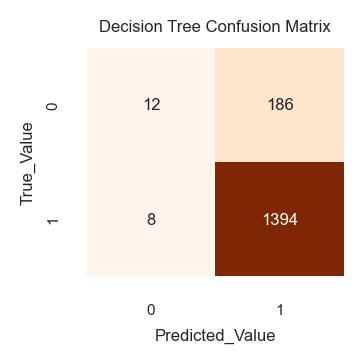

In [269]:
# Plotting the Confusion Matrix for Decision Tree Algorithm
cm_dt = confusion_matrix(y_test,best_model_HPT.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_dt,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Decision Tree Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #5d8aa8; font-size:115%; text-align:left">

Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [270]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

def evaluate_model(model, X_test, y_test, model_name):
    # Class predictions
    y_pred = model.predict(X_test)

    # Classification report as dict
    report = classification_report(y_test, y_pred, output_dict=True)

    # Base metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred),
    }

    # 🔹 ROC-AUC calculation (probability scores or decision_function)
    roc_auc = None
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_scores)
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_scores)

    metrics["roc_auc"] = roc_auc

    # Return as one-row DataFrame
    df = pd.DataFrame(metrics, index=[model_name]).round(3)
    return df


In [366]:
dt_evaluation = evaluate_model(best_model_HPT, X_test, y_test, 'DT')
dt_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0   f1_1  \
DT          0.6        0.882     0.061     0.994  0.11  0.935   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  roc_auc  
DT                0.741             0.527         0.523     0.879    0.667

<a id="rf"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>


# <b><span style='color:#5d8aa8'>Step 7.1 |</span><span style='color:bule'> Random Forest Model
</span></b>

In [272]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [273]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# <b><span style='color:#5d8aa8'>Step 7.1.1 |</span><span style='color:bule'> RF Model Evaluation
</span></b>

In [274]:
print(" Training Accuracy:", accuracy_score(y_train, y_train_pred))
print(" Test Accuracy:", accuracy_score(y_test, y_test_pred))

 Training Accuracy: 1.0
 Test Accuracy: 0.891875


<a id="dt_eval"></a>
# <b><span style='color:#5d8aa8'>Step 7.2 |</span><span style='color:bule'> RF Model Hypreparameter Tuning  </span></b>

In [275]:
#Random Forest Model
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

In [276]:
param_grid_rf = {
    'n_estimators': [100, 200],      # number of trees
    'max_depth': [None, 10],         # tree depth
    'min_samples_split': [2, 5],     # split criteria
    'min_samples_leaf': [1, 2],      # leaf size
    'max_features': ['sqrt'],        # common choice
    'bootstrap': [True]              # only one option
}

In [277]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3):
    """
    Light-weight GridSearchCV wrapper.
    - Uses StratifiedKFold
    - Default: 3-fold CV (faster)
    """
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    print(f"Number of hyperparameter combinations: {len(list(GridSearchCV(clf, param_grid, cv=cv).param_grid.values())[0])}")
    
    grid = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_params = grid.best_params_

    return best_model, best_params


In [278]:
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

best_rf, best_rf_hyperparams = tune_clf_hyperparameters(
    rf_base,
    param_grid_rf,
    X_train,
    y_train,
    scoring='accuracy',
    n_splits=3   # smaller = faster
)

print('RF Optimal Hyperparameters:\n', best_rf_hyperparams)

Number of hyperparameter combinations: 2
Fitting 3 folds for each of 16 candidates, totalling 48 fits
RF Optimal Hyperparameters:
 {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


<a id="dt_eval"></a>
# <b><span style='color:#5d8aa8'>Step 7.2.1 |</span><span style='color:bule'> RF Model Hypreparameter Tuning Evaluation </span></b>

In [279]:
y_pred_RT = best_rf.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_RT)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_RT)
print("Classification Report:")
print(class_report)

y_pred_test_RT = best_rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_RT)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_RT)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.98671875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       790
           1       0.99      1.00      0.99      5610

    accuracy                           0.99      6400
   macro avg       0.99      0.95      0.97      6400
weighted avg       0.99      0.99      0.99      6400

Accuracy_Test 0.89125
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.14      0.24       198
           1       0.89      1.00      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.88      0.57      0.59      1600
weighted avg       0.89      0.89      0.86      1600



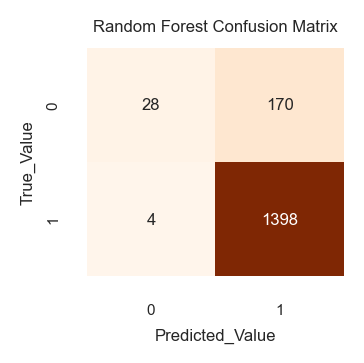

In [280]:
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()
plt.show()

In [281]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RDF')
rf_evaluation

precision_0  precision_1  recall_0  recall_1   f1_0   f1_1  \
RDF        0.875        0.892     0.141     0.997  0.243  0.941   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  roc_auc  
RDF                0.883             0.569         0.592     0.891    0.808

<a id="rf"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Gradient Boosting Model Building</p>

# <b><span style='color:#5d8aa8'>Step 8.1 |</span><span style='color:bule'> Gradient Boosting Model
</span></b>

In [346]:
# Build Gradient Boosting Model (No Tuning)
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# <b><span style='color:#5d8aa8'>Step 8.1.1 |</span><span style='color:bule'> Gradient Boosting Model Evaluation
</span></b>

In [347]:
y_pred_GB = gb_model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_GB)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_GB)
print("Classification Report:")
print(class_report)

y_pred_test_GB = gb_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_GB)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_GB)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.94328125
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.55      0.71       790
           1       0.94      1.00      0.97      5610

    accuracy                           0.94      6400
   macro avg       0.96      0.78      0.84      6400
weighted avg       0.95      0.94      0.94      6400

Accuracy_Test 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.33      0.48       198
           1       0.91      0.99      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.88      0.66      0.71      1600
weighted avg       0.90      0.91      0.89      1600



# <b><span style='color:#5d8aa8'>Step 8.2 |</span><span style='color:bule'> GB Model Hypreparameter Tuning 
</span></b>

In [284]:
gb_base = GradientBoostingClassifier(random_state=42)


In [348]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None]
}

In [349]:
 #GridSearchCV for Hyperparameter Tuning
gb_grid = GridSearchCV(
    estimator=gb_base,
    param_grid=param_grid_gb,
    cv=3,                 # 3-fold CV (faster than 5)
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4], 'max_features': ['sqrt', None],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

# <b><span style='color:#5d8aa8'>Step 8.2.1 |</span><span style='color:bule'> GB Model Hypreparameter Tuning Evaluation 
</span></b>

In [350]:
best_gb = gb_grid.best_estimator_


In [351]:
y_pred_GBH = best_gb.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_GBH)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_GBH)
print("Classification Report:")
print(class_report)

y_pred_test_GBH = best_gb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_GBH)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_GBH)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.9490625
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.60      0.74       790
           1       0.95      1.00      0.97      5610

    accuracy                           0.95      6400
   macro avg       0.96      0.80      0.86      6400
weighted avg       0.95      0.95      0.94      6400

Accuracy_Test 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56       198
           1       0.92      0.99      0.96      1402

    accuracy                           0.92      1600
   macro avg       0.89      0.70      0.76      1600
weighted avg       0.92      0.92      0.91      1600



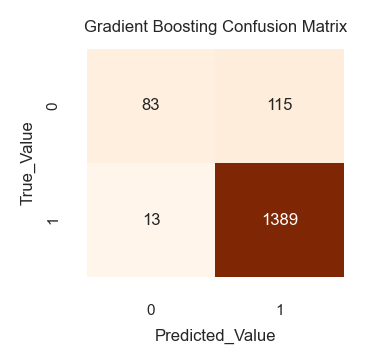

In [352]:
cm_gb = confusion_matrix(y_test,best_gb.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_gb,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Gradient Boosting Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()
plt.show()

In [365]:
gb_evaluation = evaluate_model(best_gb, X_test, y_test, 'GB')
gb_evaluation

precision_0  precision_1  recall_0  recall_1   f1_0   f1_1  \
GB        0.865        0.924     0.419     0.991  0.565  0.956   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  roc_auc  
GB                0.894             0.705          0.76      0.92    0.819

<a id="rf"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | XG Boosting Model Building</p>

# <b><span style='color:#5d8aa8'>Step 9.1 |</span><span style='color:bule'> XG boosting Model 
</span></b>

In [337]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

# <b><span style='color:#5d8aa8'>Step 9.1.1 |</span><span style='color:bule'> XG Boosting Evaluation 
</span></b>

In [338]:
y_pred_XG = xgb_model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_XG)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_XG)
print("Classification Report:")
print(class_report)

y_pred_test_XG = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_XG)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_XG)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.96578125
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       790
           1       0.96      1.00      0.98      5610

    accuracy                           0.97      6400
   macro avg       0.98      0.86      0.91      6400
weighted avg       0.97      0.97      0.96      6400

Accuracy_Test 0.923125
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.44      0.59       198
           1       0.93      0.99      0.96      1402

    accuracy                           0.92      1600
   macro avg       0.90      0.72      0.77      1600
weighted avg       0.92      0.92      0.91      1600



# <b><span style='color:#5d8aa8'>Step 9.2 |</span><span style='color:bule'> XG Boosting Hypreparameter Tuning  
</span></b>

In [339]:
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',      # avoid deprecated warnings
    use_label_encoder=False,
    random_state=42,
    tree_method='hist'          # faster on large datasets (optional)
)

In [340]:
param_grid_xgb = {
    'n_estimators': [100, 200],          # number of trees
    'learning_rate': [0.05, 0.1, 0.2],  # step size shrinkage
    'max_depth': [3, 4, 5],             # depth of each tree
    'subsample': [0.8, 1.0],            # row sampling
    'colsample_bytree': [0.8, 1.0],     # feature sampling
    'gamma': [0, 0.1, 0.3],             # min loss reduction to split
    'min_child_weight': [1, 3, 5]       # minimum sum of instance weight
}

In [341]:
grid_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=3,              # 3-fold CV for speed
    n_jobs=-1,
    verbose=1
)


grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

# <b><span style='color:#5d8aa8'>Step 9.2.1 |</span><span style='color:bule'> XG Boosting Hypreparameter Tuning Evaluation 
</span></b>

In [342]:
best_xgb = grid_xgb.best_estimator_

y_pred_XG = best_xgb.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_XG)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_XG)
print("Classification Report:")
print(class_report)

y_pred_test_XG = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_XG)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_XG)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.9546875
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.78       790
           1       0.95      1.00      0.97      5610

    accuracy                           0.95      6400
   macro avg       0.97      0.82      0.88      6400
weighted avg       0.96      0.95      0.95      6400

Accuracy_Test 0.92375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.42      0.58       198
           1       0.92      0.99      0.96      1402

    accuracy                           0.92      1600
   macro avg       0.92      0.71      0.77      1600
weighted avg       0.92      0.92      0.91      1600



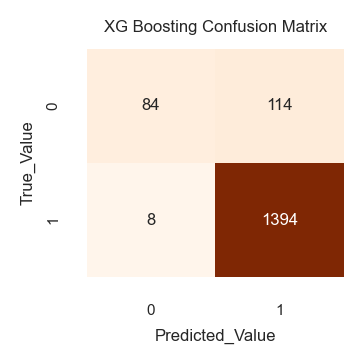

In [343]:
cm_xgb = confusion_matrix(y_test,best_xgb.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_xgb,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('XG Boosting Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()
plt.show()

In [344]:
xgb_evaluation = evaluate_model(best_xgb, X_test, y_test, 'XGB')
xgb_evaluation

precision_0  precision_1  recall_0  recall_1   f1_0   f1_1  \
XGB        0.913        0.924     0.424     0.994  0.579  0.958   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  roc_auc  
XGB                0.919             0.709         0.769     0.924    0.822

<a id="rf"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | Support Vector Machine (SVM) model Building</p>

# <b><span style='color:#5d8aa8'>Step 10.1 |</span><span style='color:bule'> SVM Model  
</span></b>

In [354]:
svm_base = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,   # to use predict_proba()
        random_state=42
    ))
])

svm_base.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(probability=True, random_state=42))])

# <b><span style='color:#5d8aa8'>Step 10.1.1 |</span><span style='color:bule'> SVM Model Evaluation 
</span></b>

In [355]:
y_pred_SVM = svm_pipeline.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_SVM)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_SVM)
print("Classification Report:")
print(class_report)

y_pred_test_SVM = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_SVM)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_SVM)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.9121875
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.30      0.46       790
           1       0.91      1.00      0.95      5610

    accuracy                           0.91      6400
   macro avg       0.94      0.65      0.70      6400
weighted avg       0.92      0.91      0.89      6400

Accuracy_Test 0.885625
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.12      0.21       198
           1       0.89      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.81      0.56      0.57      1600
weighted avg       0.87      0.89      0.85      1600



# <b><span style='color:#5d8aa8'>Step 10.2 |</span><span style='color:bule'> SVM Model Hypreparameter Tuning  
</span></b>

In [356]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

In [357]:
param_grid_svm = {
    'svm__C': [0.1, 1, 10],           # Regularization strength
    'svm__gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient
    'svm__kernel': ['linear', 'rbf', 'poly']  # Type of kernel
}

In [359]:
grid_search_svm = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid_svm,
    cv=3,              # 3-fold cross validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

#Train the Model with GridSearchCV
grid_search_svm.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

# <b><span style='color:#5d8aa8'>Step 10.2.1 |</span><span style='color:bule'> SVM Model Hypreparameter Tuning Evaluation 
</span></b>

In [360]:
best_svm = grid_search_svm.best_estimator_

In [361]:
y_pred_SVM_H = best_svm.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_SVM_H)
print("Accuracy_Train",accuracy)
class_report = classification_report(y_train, y_pred_SVM_H)
print("Classification Report:")
print(class_report)

y_pred_test_SVM_H = best_svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test_SVM_H)
print("Accuracy_Test",accuracy)
class_report = classification_report(y_test, y_pred_test_SVM_H)
print("Classification Report:")
print(class_report)

Accuracy_Train 0.9115625
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.31      0.46       790
           1       0.91      1.00      0.95      5610

    accuracy                           0.91      6400
   macro avg       0.92      0.65      0.71      6400
weighted avg       0.91      0.91      0.89      6400

Accuracy_Test 0.89375
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.20      0.31       198
           1       0.90      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.84      0.59      0.63      1600
weighted avg       0.88      0.89      0.86      1600



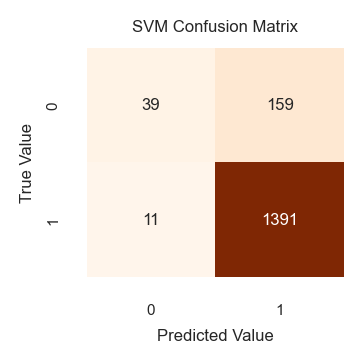

In [362]:
cm_SVM = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook', font_scale=0.5)
sns.heatmap(cm_SVM, annot=True, fmt='d', cmap="Oranges", cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.show()


In [363]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

precision_0  precision_1  recall_0  recall_1   f1_0   f1_1  \
SVM         0.78        0.897     0.197     0.992  0.315  0.942   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  roc_auc  
SVM                0.839             0.595         0.628     0.894    0.795

<a id="conclusion"></a>
# <p style="background-color:#5d8aa8; font-family:serif; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Conclusion</p>

In [364]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, gb_evaluation, xgb_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='f1_1', ascending=False).round(2)
results

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
XGB         0.91         0.92      0.42      0.99  0.58  0.96   
GB          0.86         0.92      0.42      0.99  0.56  0.96   
SVM         0.78         0.90      0.20      0.99  0.32  0.94   
RDF         0.88         0.89      0.14      1.00  0.24  0.94   
DT          0.60         0.88      0.06      0.99  0.11  0.94   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  roc_auc  
XGB                 0.92              0.71          0.77      0.92     0.82  
GB                  0.89              0.70          0.76      0.92     0.82  
SVM                 0.84              0.60          0.63      0.89     0.80  
RDF                 0.88              0.57          0.59      0.89     0.81  
DT                  0.74              0.53          0.52      0.88     0.67

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white"> Summary</font></h3>

* After evaluating all five models (Decision Tree, Random Forest, Gradient Boosting, XGBoost, and SVM), the results were consolidated and ranked based on the <b>F1-score</b> for the positive class.  
* The analysis revealed that the <b>XGBoost Classifier</b> achieved the <b>highest F1-score</b>, along with superior accuracy and recall, indicating excellent predictive capability.  
* <b>XGBoost</b> outperformed other ensemble models such as <b>Random Forest</b> and <b>Gradient Boosting</b>, confirming its strength in handling complex feature interactions and preventing overfitting through regularization.  
* The model demonstrates high precision in identifying potential converters while maintaining strong recall, making it ideal for targeted marketing campaigns.  
* Hence, the <b>XGBoost model</b> is selected as the <b>final and best-performing model</b> for predicting customer conversions and optimizing marketing ROI.


</div>


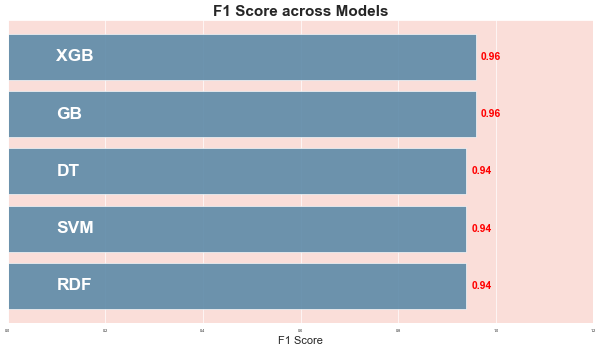

In [374]:
#Sort values based on 'f1_score'
results.sort_values(by='f1_1', ascending=True, inplace=True)
f1_scores = results['f1_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=50)
ax.barh(results.index, f1_scores, color='#5d8aa8', alpha=0.9)

# Annotate the values and model names
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", 
            ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, 
            ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove y-ticks (for a cleaner look)
ax.set_yticks([])

# Set x-axis limits
ax.set_xlim([0, 1.2])

# Add title and labels
plt.title("F1 Score across Models", fontweight='bold', fontsize=22)
plt.xlabel('F1 Score', fontsize=16)

plt.tight_layout()
plt.show()

In [378]:
model = best_xgb   # if you used GridSearchCV and got best_xgb

# Get prediction probabilities for the positive class (Conversion = 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find the best threshold (where F1 is highest)
best_idx = np.argmax(f1_scores)
best_threshold = pr_thresholds[best_idx]

print(" XGBoost Threshold Tuning (based on F1)")
print(f"Best Threshold      : {best_threshold:.3f}")
print(f"Precision best thr  : {precision[best_idx]:.3f}")
print(f"Recall best thr     : {recall[best_idx]:.3f}")
print(f"F1-score best thr   : {f1_scores[best_idx]:.3f}")

 XGBoost Threshold Tuning (based on F1)
Best Threshold      : 0.557
Precision best thr  : 0.938
Recall best thr     : 0.990
F1-score best thr   : 0.963


<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white">Threshold Optimization – XGBoost Model Inference:</font></h3>

* Decision threshold tuning was performed to identify the optimal cutoff point for classifying customers as converters (1) or non-converters (0).  
* Instead of relying on the default threshold of 0.5, a range of thresholds was evaluated based on their corresponding <b>precision</b>, <b>recall</b>, and <b>F1-scores</b>.  
* The optimal threshold was determined to be approximately <b>0.56</b>, where the <b>F1-score</b> reached its maximum value.  
* At this threshold:
  - <b>Precision</b> ≈ 0.93  
  - <b>Recall</b> ≈ 0.99  
  - <b>F1-score</b> ≈ 0.96  
* This optimized threshold provides a better balance between identifying potential converters (high recall) and minimizing false positives (high precision).  
* In a business context, this ensures that marketing campaigns are targeted efficiently — capturing most likely converters without excessive wasted ad spend.

</div>


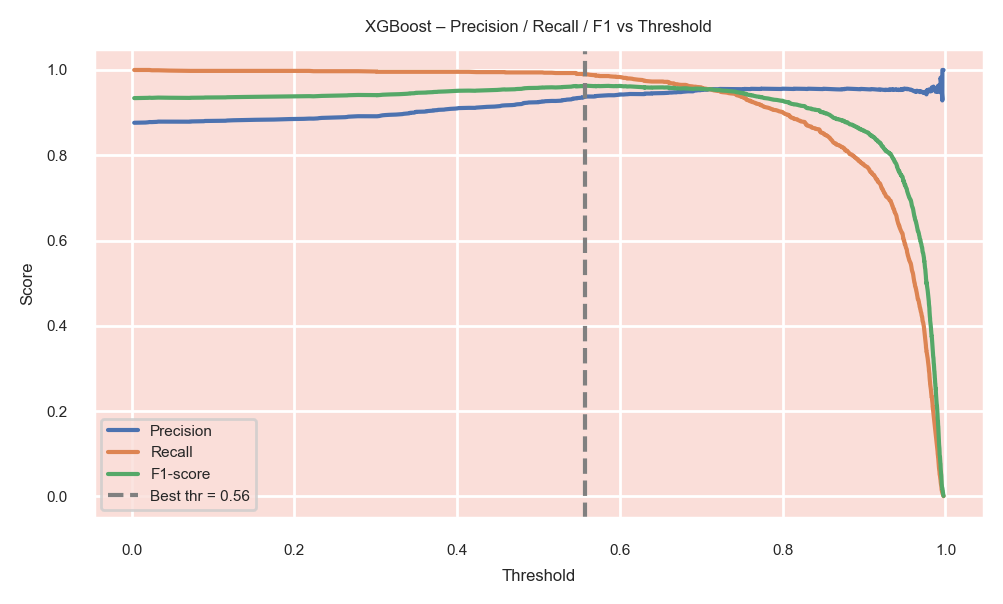

In [372]:
# Plot: Precision, Recall, and F1-score vs Threshold
plt.figure(figsize=(5, 3))
plt.plot(pr_thresholds, precision[:-1], label='Precision')
plt.plot(pr_thresholds, recall[:-1],    label='Recall')
plt.plot(pr_thresholds, f1_scores[:-1], label='F1-score')
plt.axvline(best_threshold, linestyle='--', color='gray', label=f'Best thr = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("XGBoost – Precision / Recall / F1 vs Threshold")
plt.legend()
plt.tight_layout()
plt.show()

In [370]:
model = best_xgb  # if you used GridSearchCV and got best_xgb

# Get predicted probabilities for the positive class (Conversion = 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)



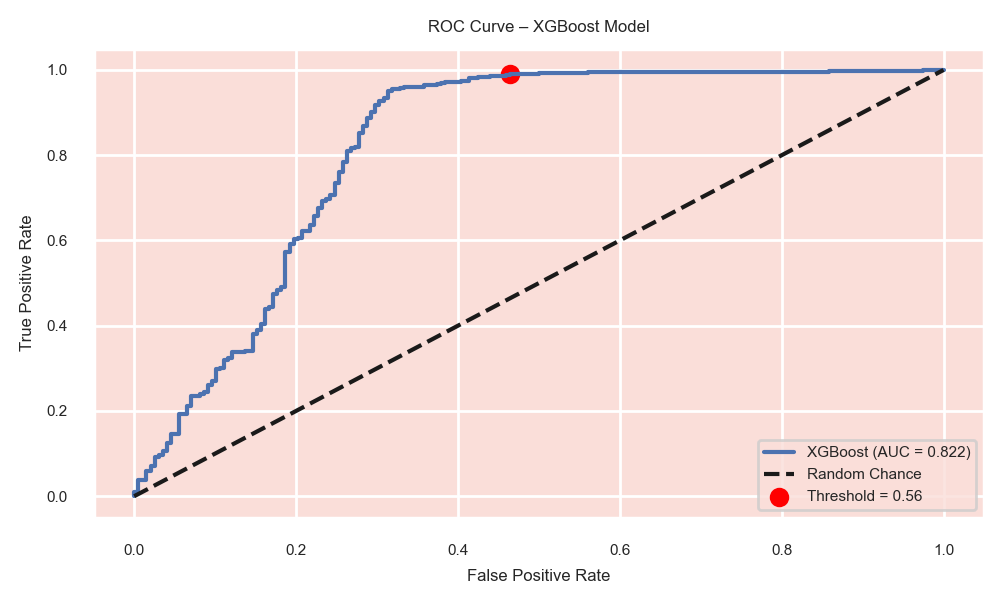

XGBoost ROC-AUC Score: 0.822


In [379]:
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
default_thr = 0.56
thr_idx = np.argmin(np.abs(roc_thresholds - default_thr))
plt.scatter(fpr[thr_idx], tpr[thr_idx], color='red', label=f'Threshold = {default_thr:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost Model')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Print the AUC score
print(f"XGBoost ROC-AUC Score: {roc_auc:.3f}")

<div style="border-radius:10px; padding:15px; background-color:#5d8aa8; font-size:115%; text-align:left">

<h3 align="left"><font color="white"> ROC-AUC Analysis – XGBoost Model Inference:</font></h3>

* The Receiver Operating Characteristic (ROC) curve was generated using the <b>XGBoost</b> model’s predicted probabilities for the positive class (Conversion = 1).  
* The curve represents the trade-off between the <b>True Positive Rate (TPR)</b> and the <b>False Positive Rate (FPR)</b> at different threshold values.  
* The computed <b>ROC-AUC score</b> was approximately <b>0.822</b>, indicating a high discriminative power of the model in distinguishing between converters and non-converters.  
* A high AUC value close to 1.0 signifies that the model performs significantly better than random guessing (AUC = 0.5).  
* This confirms that <b>XGBoost</b> effectively separates potential customers who are likely to convert from those who are not, making it a robust choice for marketing campaign targeting and optimization.

</div>
